# Initializing and Referencing Basic Libraries

In [25]:
# import Libraries
from IPython.display import clear_output

from io import StringIO
import pandas as pd
import requests
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Machine Learning Libraries

from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing  import OneHotEncoder
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

In [26]:
# Loading Data from URL

url='https://raw.githubusercontent.com/saqibmujtaba/Machine-Learning/DataFiles/50_Startups.csv'
s=requests.get(url).text

dataset=pd.read_csv(StringIO(s))

In [27]:
# Size of data

print(dataset.shape)

(50, 5)


In [28]:
# Variables variation - Qualitative and Quantitative 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [29]:
dataset.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
4,142107.34,91391.77,366168.42,Florida,166187.94
7,130298.13,145530.06,323876.68,Florida,155752.60
6,134615.46,147198.87,127716.82,California,156122.51
19,86419.70,153514.11,0.00,New York,122776.86
40,28754.33,118546.05,172795.67,California,78239.91


# Checking Categorical Data in Dataset

In [30]:
# Gives columns that need to be encoded
def columnsToEncode(df):
    return list(df.select_dtypes(include=['category','object']))

columnsToEncode(dataset)

['State']

In [31]:
dataset.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

# Clearly , we have to do Label Encoding on the State column as its a categorical variable.

In [32]:
# Co-relation between different varaibles.

pd.set_option('display.width',100)
pd.set_option('precision',3)
corr = dataset.corr(method='pearson', min_periods=1)

dataset.corr(method='pearson', min_periods=1)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000,0.242,0.724,0.973
Administration,0.242,1.000,-0.032,0.201
Marketing Spend,0.724,-0.032,1.000,0.748
Profit,0.973,0.201,0.748,1.000


In [33]:
import seaborn as sns

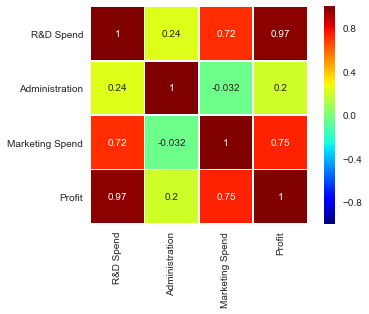

In [34]:
# Visualize co-relation by creating Co-relational Matrix

sns.heatmap(corr, cmap='jet',square=True, linewidths=.5,annot=True)

plt.show()

# cmap = Paired, Rainbow, jet, Greens, Blues, copper, seismic
# Jet is used mostly as it is having a good variation of color sampling

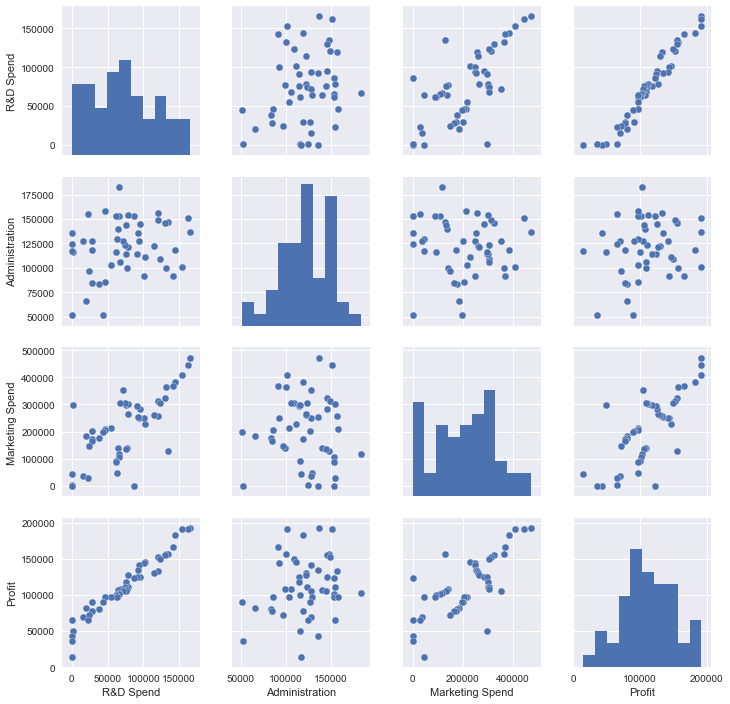

In [11]:
# Seaborn Pairplot
sns.pairplot(data=dataset)

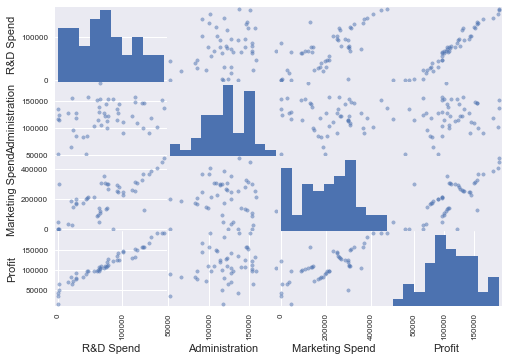

In [12]:
# Scatter Plot Matrix

from pandas.tools.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

# Spliting Input and Output Variables

In [35]:
dataset.columns

Index([u'R&D Spend', u'Administration', u'Marketing Spend', u'State', u'Profit'], dtype='object')

In [14]:
# Create Independent Variable Vector
# X=dataset.iloc[:,:-1].values # X  needs to be a matrix, not a vector
              
# Dependent Variable Vector             
# Y=dataset.iloc[:,4].values


In [36]:
predictors=['R&D Spend', 'Administration', 'Marketing Spend','State']
X=dataset[predictors]
y=dataset['Profit']

In [37]:
print X.sample(5)

    R&D Spend  Administration  Marketing Spend       State
23   67532.53       105751.03        304768.73     Florida
26   75328.87       144135.98        134050.07     Florida
2   153441.51       101145.55        407934.54     Florida
22   73994.56       122782.75        303319.26     Florida
42   23640.93        96189.63        148001.11  California


# Encoding categorical data Using OneHotEncoder

OneHotEncoder
Encode categorical integer features using a one-hot aka one-of-K scheme.
The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features.
The output will be a sparse matrix where each column corresponds to one possible value of one feature.
It is assumed that input features take on values in the range [0, n_values).
This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

In [38]:
# Passing State Column for encoding

labelencoder = LabelEncoder()
X.iloc[:,3] = labelencoder.fit_transform(X.iloc[:,3])
print X.head(5)

   R&D Spend  Administration  Marketing Spend  State
0  165349.20       136897.80        471784.10      2
1  162597.70       151377.59        443898.53      0
2  153441.51       101145.55        407934.54      1
3  144372.41       118671.85        383199.62      2
4  142107.34        91391.77        366168.42      1


In [39]:
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
print X[0:5,:]

[[ 0  0  1  165349  136898  471784]
 [ 1  0  0  162598  151378  443899]
 [ 0  1  0  153442  101146  407935]
 [ 0  0  1  144372  118672  383200]
 [ 0  1  0  142107  91392  366168]]


In [40]:
print onehotencoder.feature_indices_

[0 3]


In [41]:
print type(X)

<type 'numpy.ndarray'>


In [42]:
# Printing in Human Readable format
np.set_printoptions(formatter={'float': '{: 0.0f}'.format})
print(X[0:5,:])

[[ 0  0  1  165349  136898  471784]
 [ 1  0  0  162598  151378  443899]
 [ 0  1  0  153442  101146  407935]
 [ 0  0  1  144372  118672  383200]
 [ 0  1  0  142107  91392  366168]]


# Avoiding the Dummy Variable Trap

In [43]:
# X.tofile('foo.csv',sep=',',format='%10.5f')

X = X[:, 1:]

In [44]:
# After Dummpy Variable Trap.

np.set_printoptions(formatter={'float': '{: 0.0f}'.format})
print(X[0:5,:])

[[ 0  1  165349  136898  471784]
 [ 0  0  162598  151378  443899]
 [ 1  0  153442  101146  407935]
 [ 0  1  144372  118672  383200]
 [ 1  0  142107  91392  366168]]


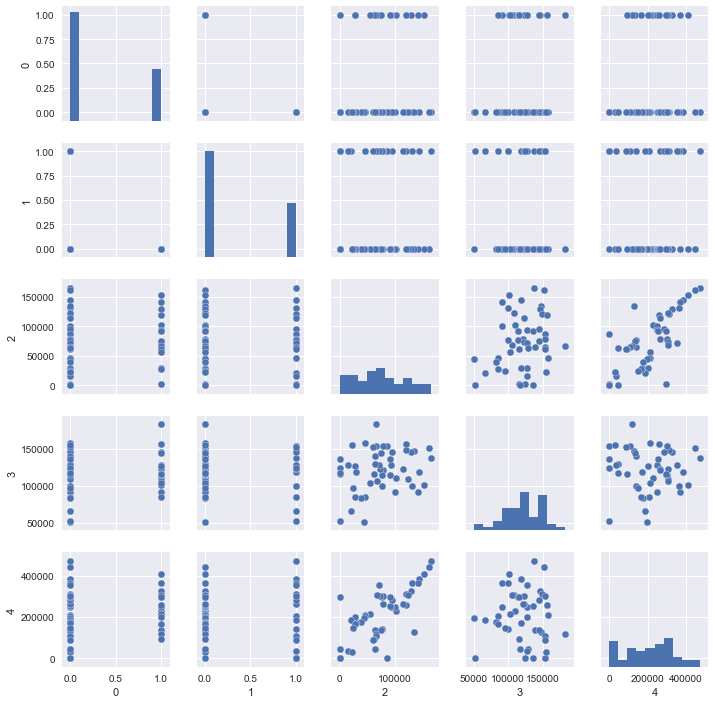

In [24]:
table = pd.DataFrame(X)
sns.pairplot(data=table,size=2)

In [25]:
# There is strong collinearity between the independent varaibles R$D Spend and Marketing Spend.

# Use Statistics for Manual Feature Elimination


In [45]:
# Using Statistical approach to remove input features by Statmodel Library
import statsmodels.api as sm

In [46]:
# Manually adding Intercept in StatModel [An interecept is not included by default and should be added by the user]
# http://statsmodels.sourceforge.net/devel/generated/statsmodels.tools.tools.add_constant.html
# On the intercept - there's nothing encoded in the number 1 
# it's just based on the math of OLS (an intercept is perfectly analogous to a regressor that always equals 1),
# so you can pull the value right off the summary.

X = sm.add_constant(X)
print(X[0:5,:]) 

[[ 1  0  1  165349  136898  471784]
 [ 1  0  0  162598  151378  443899]
 [ 1  1  0  153442  101146  407935]
 [ 1  0  1  144372  118672  383200]
 [ 1  1  0  142107  91392  366168]]


In [47]:
# Check if X is a numpy array
X.shape

(50L, 6L)

In [48]:
# index 0 - Intercept
# index 1 - Dummy Variable [State]
# index 2 - Dummy Variable [State]
# index 3 - R&D Spend   
# index 4 - Marketing Spend
# index 5 - Administration 

print X[:5,[0,1,2,3,4,5]]


[[ 1  0  1  165349  136898  471784]
 [ 1  0  0  162598  151378  443899]
 [ 1  1  0  153442  101146  407935]
 [ 1  0  1  144372  118672  383200]
 [ 1  1  0  142107  91392  366168]]


# Evaluating Best Features using Backward Elimination

Trying OLS Regression using all the input features.

In [49]:
regressor_OLS = sm.OLS(endog=y,exog=X[:,[0,1,2,3,4,5]]).fit()
print(regressor_OLS.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 14 Aug 2017   Prob (F-statistic):           1.34e-27
Time:                        18:21:20   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.0

# Evaluation :

Clearly, multicollinearity is also suggested by StatModel as a Warning.

In the abve summary, we get R-Squared - determines how well the regression line fits data. However, it is very bias towards the number of input features. Even if we introduce new variable like SEX (which would be totally insane), R^2 value will increase. Therefore, we evaluate model based on Adj. R^2, we gets pinalised if we add more Input features. We choose the best (closer to 1) Adj. R^ values.

P-Value Significance:

We consider P value within 0.05 (5%). In the above case, we X1, X2 [State] column has the highest P Value. Therefore, by removing State column we will again run the OLS regression.


R-squared:       0.951
Adj. R-squared:  0.945

Trying after removing State Column

In [31]:
regressor_OLS = sm.OLS(endog=y,exog=X[:,[0,3,4,5]]).fit() # R$D, Admin, Mrkt Spends
print(regressor_OLS.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 14 Aug 2017   Prob (F-statistic):           4.53e-30
Time:                        15:24:19   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.0

In [32]:
# Trying after removing Administration Column

In [33]:
regressor_OLS = sm.OLS(endog=y,exog=X[:,[0,3,5]]).fit() # R$D and Mrkt Spends
print(regressor_OLS.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 14 Aug 2017   Prob (F-statistic):           2.16e-31
Time:                        15:24:20   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0

In [34]:
# Trying after removing Marketing Spend Column

In [78]:
regressor_OLS = sm.OLS(endog=y,exog=X[:,[0,3]]).fit() # R&D Spend
print(regressor_OLS.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 14 Aug 2017   Prob (F-statistic):           3.50e-32
Time:                        18:32:28   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

# Conclusion: 

After removing Marketing Spend, we are seeing a decline in both R^2 {0.950 -> 0.947} and Adj. R^2 {0.948 -> 0.945}, therefore statistically we consider the both R&D and Marketing Spend are the best predictors for Profit.

regressor_OLS = sm.OLS(endog=y,exog=X[:,[0,3,5]]).fit() # R&D and Mrkt Spends

Therefore, we are choosing both R$D and Marketing Spend for predicting the Profits.

In [79]:
regressor_OLS = sm.OLS(endog=y,exog=X[:,[0,3,5]]).fit() # R&D and Mrkt Spends

# Predictions

In [81]:
# We need to pass Intercept always = 1
regressor_OLS.predict([[1,142107, 91392]])
#[142107, 91392]
#[1,22177,28334]

array([ 162909])

In [52]:
fittedY=regressor_OLS.predict(exog=X[:,[0,3,5]])

In [64]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, fittedY)

# Calculate the RMSE
np.sqrt(mse)

8881.8858924491688

# RMSE Vs R^2

Both the Root-Mean-Square-Error (RMSE) and coefficient of determination (R2R2) offer different, yet complementary, information that should be assessed when evaluating your physical model. Neither is "better", but some reports might focus more on one metric depending on the particular application.

I would use the following as a very general guide to understanding the difference between both metrics:

The RMSE gives you a sense of how close (or far) your predicted values are from the actual data you are attempting to model. 

This is useful in a variety of applications where you wish to understand the accuracy and precision of your model's predictions (e.g., modelling tree height).

Pros

It is relatively easy to understand and communicate since reported values are in the same units as the dependent variable being modelled.

Cons

It is sensitive to large errors (penalizes large prediction errors more than smaller prediction errors).

The coefficient of determination (R2R2) is useful when you are attempting to understand how well your selected independent variable(s) explain the variability in your dependent variable(s). This is useful when you are attempting to explain what factors might be driving the underlying process of interest (e.g., climatic variables and soil conditions related to tree height).

Pros

Gives an overall sense of how well your selected variables fit the data.

Cons

As more independent variables are added to your model, R2R2 increases (see adj. R2R2 or Akaike's Information Criterion as potential alternatives).

Of course, the above will be subject to sample size and sampling design, and a general understanding that correlation does not imply causation.

In [40]:
# Creating dataframe for 

df_Predict=pd.DataFrame({'Actual':y, 'Predicted':regressor_OLS.fittedvalues},columns = ['Actual','Predicted'])
df_Predict['Deviation']=df_Predict['Actual']-df_Predict['Predicted']

In [41]:
df_Predict.sample(10)

,Actual,Predicted,Deviation
10,146121.95,135011.915,11110.035
0,192261.83,192800.459,-538.629
2,191050.39,181405.378,9645.012
5,156991.12,162879.311,-5888.191
47,42559.73,46975.864,-4416.134
14,132602.65,150192.492,-17589.842
28,103282.38,103125.013,157.367
17,125370.37,130829.445,-5459.075
33,96778.92,97600.730,-821.810
9,149759.96,154343.814,-4583.854


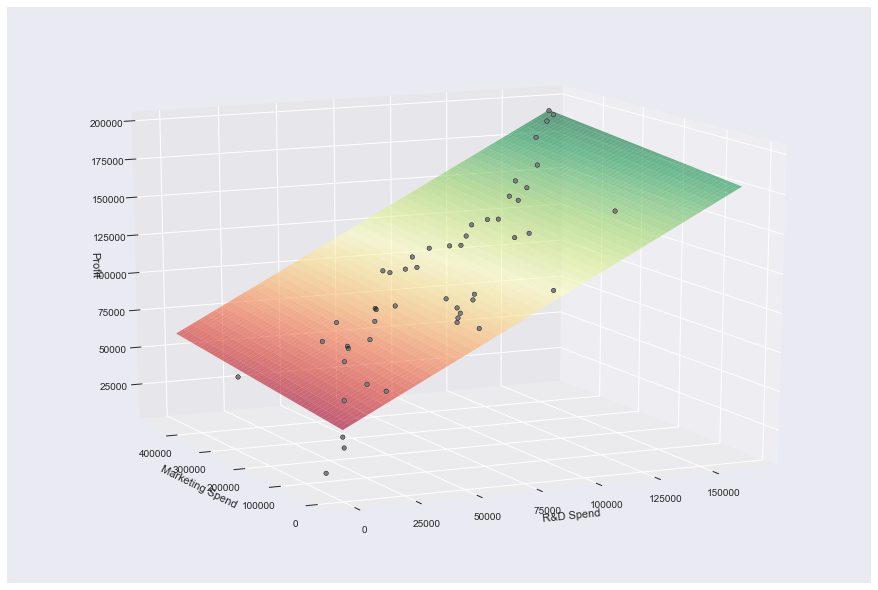

In [42]:
from mpl_toolkits.mplot3d import Axes3D

# Intializing Dependent Variables
X1 = X[:,[3]]
X2 = X[:,[5]]

newY=y.ravel()

xx1, xx2 = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                       np.linspace(X2.min(), X2.max(), 100))

# plot the hyperplane by evaluating the parameters on the grid
Z = regressor_OLS.params[0] + regressor_OLS.params[1] * xx1 + regressor_OLS.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdYlGn, alpha=0.6, linewidth=2)

# plot data points - points over the HP are white, points below are black
resid = newY - regressor_OLS.predict([X[:,[0,3,5]]])

ax.scatter(X[:,[3]],X[:,[5]],y,  alpha=1.0,color='black', facecolor='white')
ax.scatter(X[:,[3]],X[:,[5]],y, color='black', alpha=0.5)


# set axis labels
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Marketing Spend')
ax.set_zlabel('Profit')


# Using Sklearn

1) Feature Elimination 

SKlearn doesn't interpret Categorical variable for Recursive Feature Elimination - RFE

2) Evaluating R^2 and Adj. R^2

In [43]:
# Taking all the continous variables for Feature Elimination in Sklearn

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# feature extraction
lr = LinearRegression()

# Rank all features, i.e continue the elimination until the last one
rfe = RFE(estimator=lr, n_features_to_select=1)
fit = rfe.fit(X[:,[3,4,5]],y)
print("Num Features: %d") % fit.n_features_
# an array with boolean values to indicate whether an attribute was selected using RFE
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

names = dataset.columns.values
print names
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), names))

Num Features: 1
Selected Features: [ True False False]
Feature Ranking: [1 3 2]
['R&D Spend' 'Administration' 'Marketing Spend' 'State' 'Profit']
Features sorted by their rank:
[(1, 'R&D Spend'), (2, 'Marketing Spend'), (3, 'Administration')]


In [55]:
# Trying Linear Regression using R&D Spend and Marketing Spend
lr = LinearRegression()
newX, y = X[:,[3,5]], y
lr.fit(newX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# compute with formulas from the theory

yhat = lr.predict(newX)
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-newX.shape[1]-1)

print r_squared, adjusted_r_squared

0.950450301556 0.94834180375


In [57]:
lr.predict([[22177,28334],[12341,22123]]) 

array([ 65489,  57468])

In [202]:
print(lr.intercept_)

46975.8642207


In [59]:
print(lr.score(newX, y))

0.950450301556


In [60]:
# Creating dataframe for 

df_Predict=pd.DataFrame({'Actual':y, 'Predicted':yhat},columns = ['Actual','Predicted'])
df_Predict['Error']=df_Predict['Actual'] - df_Predict['Predicted']

In [51]:
df_Predict.sample(10)

,Actual,Predicted,Deviation
25,107404.34,102612.909,4791.431
48,35673.41,47407.653,-11734.243
43,69758.98,60390.233,9368.747
35,96479.51,89776.494,6703.016
0,192261.83,192800.459,-538.629
26,105733.54,110990.793,-5257.253
5,156991.12,162879.311,-5888.191
13,134307.35,127812.205,6495.145
4,166187.94,171127.623,-4939.683
1,191792.06,189774.659,2017.401


In [53]:
# As aligned to Statmodel, R^2 and Adj, R^2 are same. However,intercept is chosen automatically.

# Feature Selection Using 
# SelectKBest and GridSearchCV  - Some basic concepts:

SelectKBest selects the top k features that have maximum relevance with the target variable.
It takes two parameters as input arguments, "k" (obviously) and the score function to rate the relevance of 
every feature with the target variable. For example, for a regression problem,
you can supply "feature_selection.f_regression" and for a classification problem, 
you can supply "feature_selection.f_classif".

GridSearchCV does cross-validation automatically internally to choose the best hyper parameters.

You can use SelectKBest and GridSearchCV together using a Pipeline with an estimator as the second step. 
The pipeline applies the first step by choosing the best k features and transforms the input data to have only these features. 
After transformation, this is then fit with your estimator. The GridSearchCV helps you to tune the 
"number of features to be selected" and the hyperparameter of the estimator, by selecting the parameters that 
give the best score on validation data.

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest,f_regression # f_regression for Regression problem & f_classif for Classification
kbest = SelectKBest(f_regression,k='all')

pipeline = Pipeline([('kbest', kbest), ('lr', LinearRegression())])
grid_search = GridSearchCV(pipeline, {'kbest__k': [1,2,3]})
grid_search.fit(X[:,[3,4,5]],y)


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('kbest', SelectKBest(k='all', score_func=<function f_regression at 0x000000000BF71908>)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kbest__k': [1, 2, 3]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

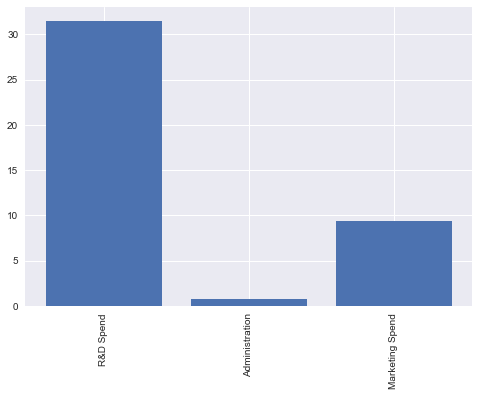

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest,f_regression # f_regression for Regression problem & f_classif for Classification


kbest = SelectKBest(f_regression,k=1)
predictors=['R&D Spend', 'Administration', 'Marketing Spend']
kbest.fit(X[:,[3,4,5]], y)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(kbest.pvalues_)

# Plot the scores.  See which "Columns" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [56]:
print grid_search.best_score_

0.724379030213


In [57]:
grid_search.best_estimator_

Pipeline(steps=[('kbest', SelectKBest(k=1, score_func=<function f_regression at 0x000000000BF71908>)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [59]:
print grid_search.cv_results_

{'std_train_score': array([ 0,  0,  0]), 'rank_test_score': array([1, 2, 3]), 'mean_score_time': array([ 0,  0,  0]), 'param_kbest__k': masked_array(data = [1 2 3],
             mask = [False False False],
       fill_value = ?)
, 'std_test_score': array([ 0,  0,  0]), 'split1_train_score': array([ 1,  1,  1]), 'split0_test_score': array([ 1,  1,  1]), 'mean_test_score': array([ 1,  1,  1]), 'split2_train_score': array([ 1,  1,  1]), 'split0_train_score': array([ 1,  1,  1]), 'params': ({'kbest__k': 1}, {'kbest__k': 2}, {'kbest__k': 3}), 'std_fit_time': array([ 0,  0,  0]), 'std_score_time': array([ 0,  0,  0]), 'split2_test_score': array([ 1,  1,  1]), 'mean_train_score': array([ 1,  1,  1]), 'mean_fit_time': array([ 0,  0,  0]), 'split1_test_score': array([ 1,  1,  1])}


# Ensembling Technique

In [124]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [195]:
params = {'n_estimators': 2000, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X[:,[1,2,3,4,5]], y)
rmse = np.sqrt(mean_squared_error(y, clf.predict(X[:,[1,2,3,4,5]])))
print("RMSE: %.4f" % rmse)


RMSE: 0.0403


In [196]:
#clf.predict([[73995, 303319],[66052, 118148],[161000,491784]])
clf.predict([[0,1,165349, 136898,471784],[0,0,162598,151378,443899]])

array([ 192262,  191792])

In [197]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [198]:
print X[:5,[1,2,3,4,5]]

[[ 0  1  165349  136898  471784]
 [ 0  0  162598  151378  443899]
 [ 1  0  153442  101146  407935]
 [ 0  1  144372  118672  383200]
 [ 1  0  142107  91392  366168]]


In [199]:
clf.feature_importances_

array([ 0,  0,  1,  0,  0])

In [ ]:
# Gradient Descent Ensembling Technique also predict that most of the important feature is R&D Spend for predicting Profit